In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
path = 'Salarios_Data.csv'

In [ ]:
df = pd.read_csv(path)
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
df.columns = ['AniosExperiencia','Salario']
df.sample(10)

,AniosExperiencia,Salario
0,1.1,39343.0
4,2.2,39891.0
14,4.5,61111.0
2,1.5,37731.0
23,8.2,113812.0
26,9.5,116969.0
21,7.1,98273.0
13,4.1,57081.0
7,3.2,54445.0
12,4.0,56957.0


#Determinar la correlación

In [ ]:
df.corr(method='pearson')


,AniosExperiencia,Salario
AniosExperiencia,1.000000,0.978242
Salario,0.978242,1.000000


#crear un gráfico

In [ ]:
y = df['Salario']
x = df.AniosExperiencia


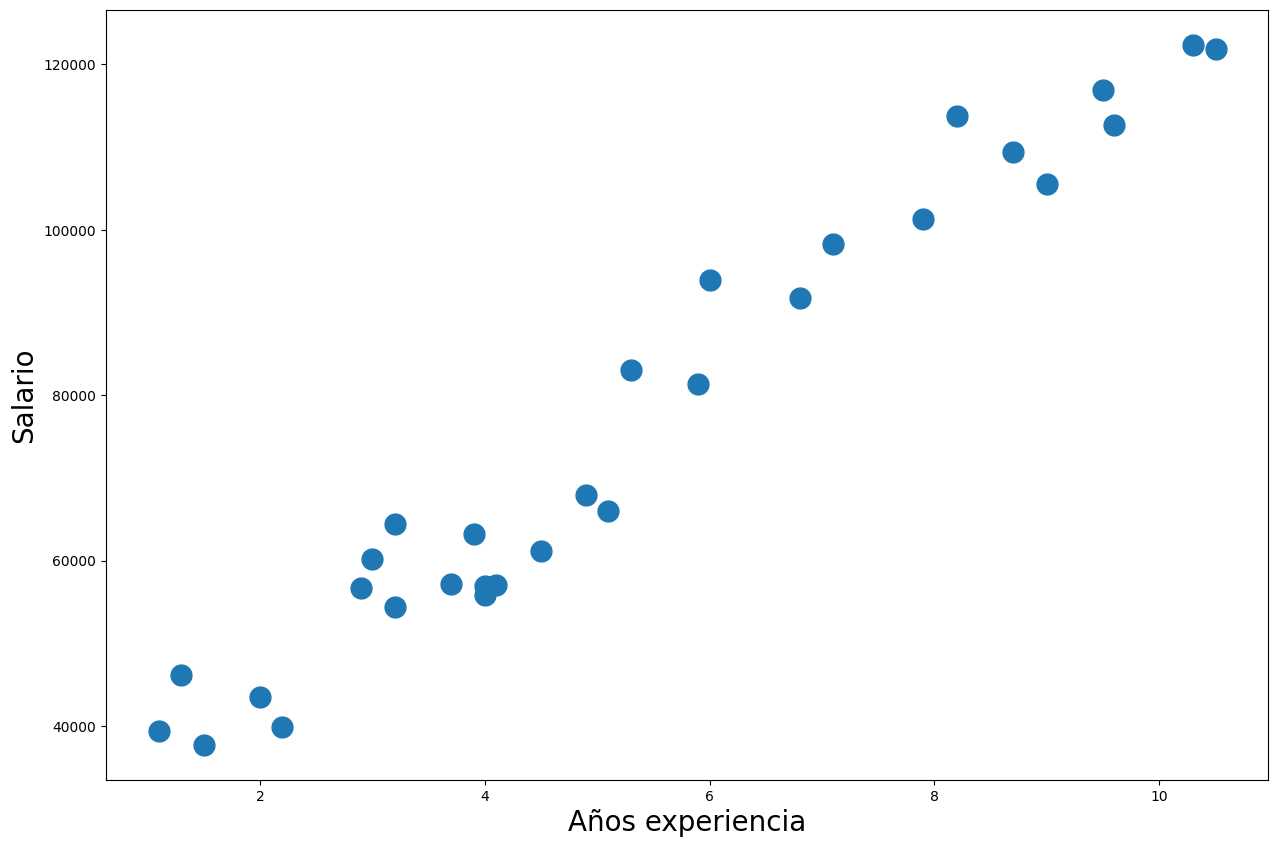

In [ ]:
#Incrementa el tamaño de gráfico
plt.figure(figsize=(15,10))

#Crear el grafico de correlación Años vs SAlario
plt.plot(x,y, 'o', markersize=15)

plt.ylabel('Salario', fontsize= 20)

plt.xlabel('Años experiencia', fontsize= 20)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#Parte 3: Realizar una regresión lineal simple

##Paso 1: Calcular la pendiente y la intersección-y, de la línea de regresión lineal

In [ ]:
m, b = np.polyfit(x,y,1)
print('La pendiente de la linea es  {:.2f}.'.format(m))
print('La y-interseccion es  {:.2f}.'.format(b))
print('La mejor linea de regresion lineal es {:.2f}x + {:.2f}.'.format(m,b))

La pendiente de la linea es  9449.96.
La y-interseccion es  25792.20.
La mejor linea de regresion lineal es 9449.96x + 25792.20.


##Paso 2: Calcular el centroide

In [ ]:
#Coordenada y para elcentroide
y_mean = y.mean()
#Coordenada x para el centroide
x_mean = x.mean()

print('El centroide para este data frame es x = {:.2f} and y = {:.2f}'.format(x_mean,y_mean))

El centroide para este data frame es x = 5.31 and y = 76003.00


##Paso 3 Superponer la línea de regresión y el punto del centroide en el gráfico

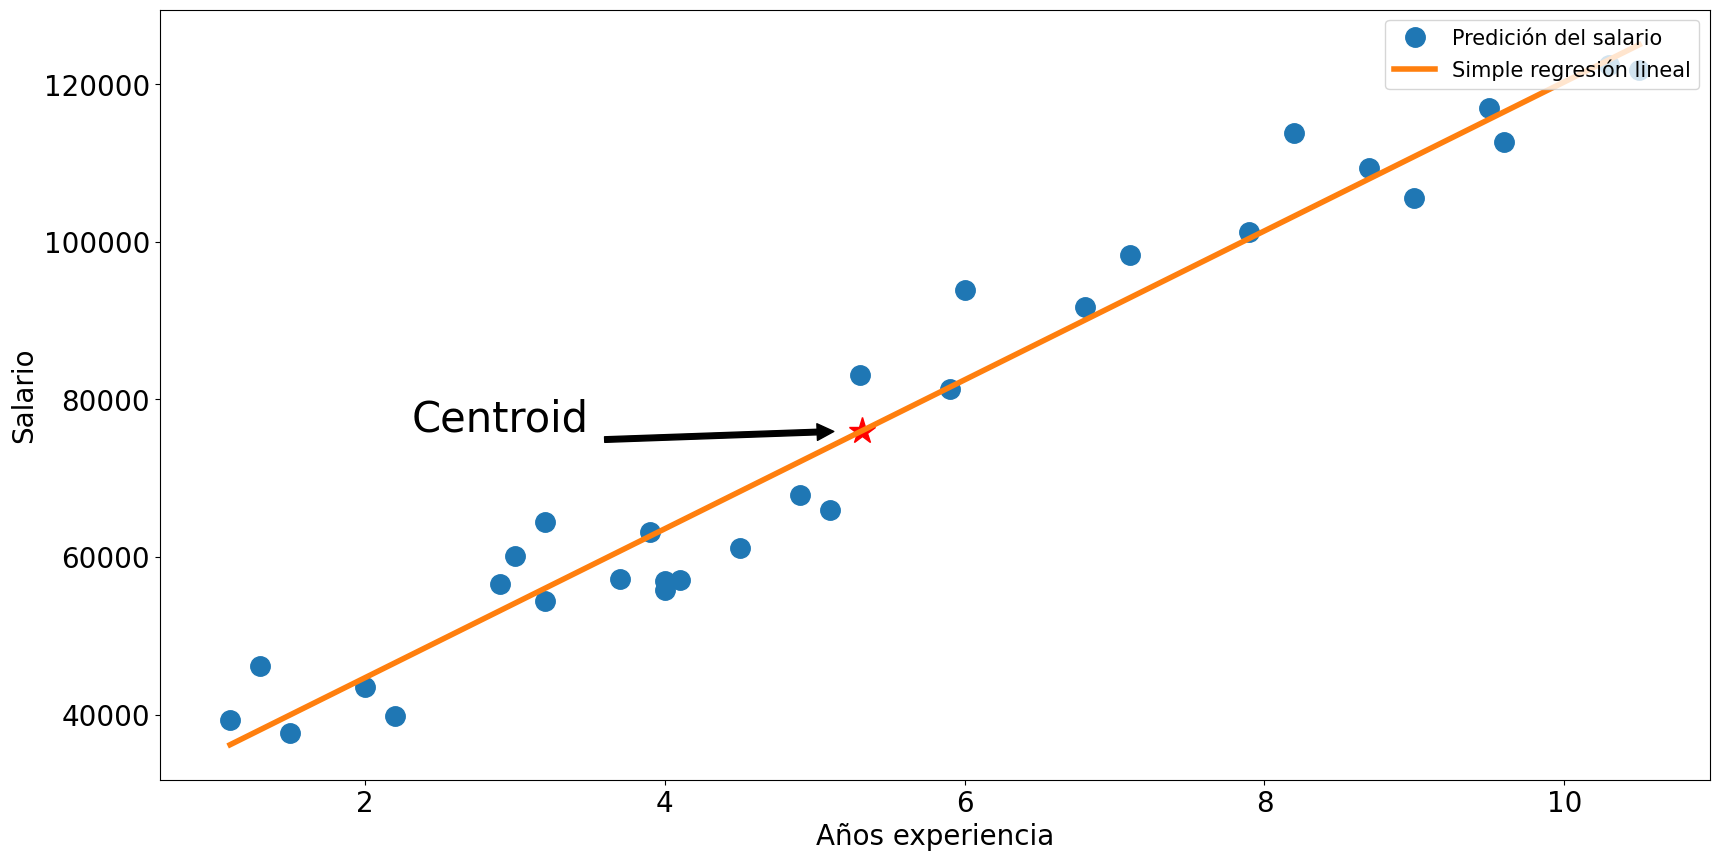

In [ ]:
#Determinar el tamaño el gráfico
plt.figure(figsize = (20,10))
#Dibujar el diagrama de dispersión del conjunto de datos
plt.plot(x,y, 'o', markersize = 14, label ='Predición del salario')
#Punto del centroide del gráfico
plt.plot(x_mean,y_mean, '*', markersize = 20, color='r')
#Gráfica de la lenea de la regresión lineal
plt.plot(x, m*x+b, '-', label='Simple regresión lineal', linewidth = 4)
#Crear los titulos del eje Y and x
plt.ylabel('Salario',fontsize = 20)
plt.xlabel('Años experiencia',fontsize = 20)
#Aumentar las marcas de los valores de X y Y
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#Señalar el punto del centroide en la gráfica
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext = (x_mean-3, y_mean-20),arrowprops = dict(facecolor = 'black', shrink= 0.05),fontsize = 30)

#crear la leyenda
plt.legend(loc = 'upper right', fontsize = 15)

plt.show()


##Paso 4: Predicción

In [ ]:
#Función para predecir los salarios de acuerdo a los años de experiencia
def predic(q):
  if q >= 1:
    return m * q + b
  else:
    print('Edad menor a un año de experiencia')

predic(25)

262041.25823504568

In [ ]:
a = pd.DataFrame({'AniosExperirncia':x, 'Salario':y,  'y_predecida': m*x + b})
a

,AniosExperirncia,Salario,y_predecida
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
